<a href="https://colab.research.google.com/github/widyamelia26/Facial-Emotion-Recognition/blob/main/CODE%20FIX/Emosi_VGG16_(augmentasi_all_classes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%bash

# Check if the dataset already exists
if test -e "emotion-detection-fer.zip"; then
    rm -rf emotion-detection-fer.zip ./train ./test
    kaggle datasets download -d ananthu017/emotion-detection-fer
    unzip emotion-detection-fer.zip
else
    kaggle datasets download -d ananthu017/emotion-detection-fer
    unzip emotion-detection-fer.zip
fi

Dataset URL: https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer
License(s): CC0-1.0

Archive:  emotion-detection-fer.zip
  inflating: test/angry/im0.png      
  inflating: test/angry/im1.png      
  inflating: test/angry/im10.png     
  inflating: test/angry/im100.png    
  inflating: test/angry/im101.png    
  inflating: test/angry/im102.png    
  inflating: test/angry/im103.png    
  inflating: test/angry/im104.png    
  inflating: test/angry/im105.png    
  inflating: test/angry/im106.png    
  inflating: test/angry/im107.png    
  inflating: test/angry/im108.png    
  inflating: test/angry/im109.png    
  inflating: test/angry/im11.png     
  inflating: test/angry/im110.png    
  inflating: test/angry/im111.png    
  inflating: test/angry/im112.png    
  inflating: test/angry/im113.png    
  inflating: test/angry/im114.png    
  inflating: test/angry/im115.png    
  inflating: test/angry/im116.png    
  inflating: test/angry/im117.png    
  inflating: test/angry/im118

100%|██████████| 65.2M/65.2M [00:00<00:00, 97.2MB/s]


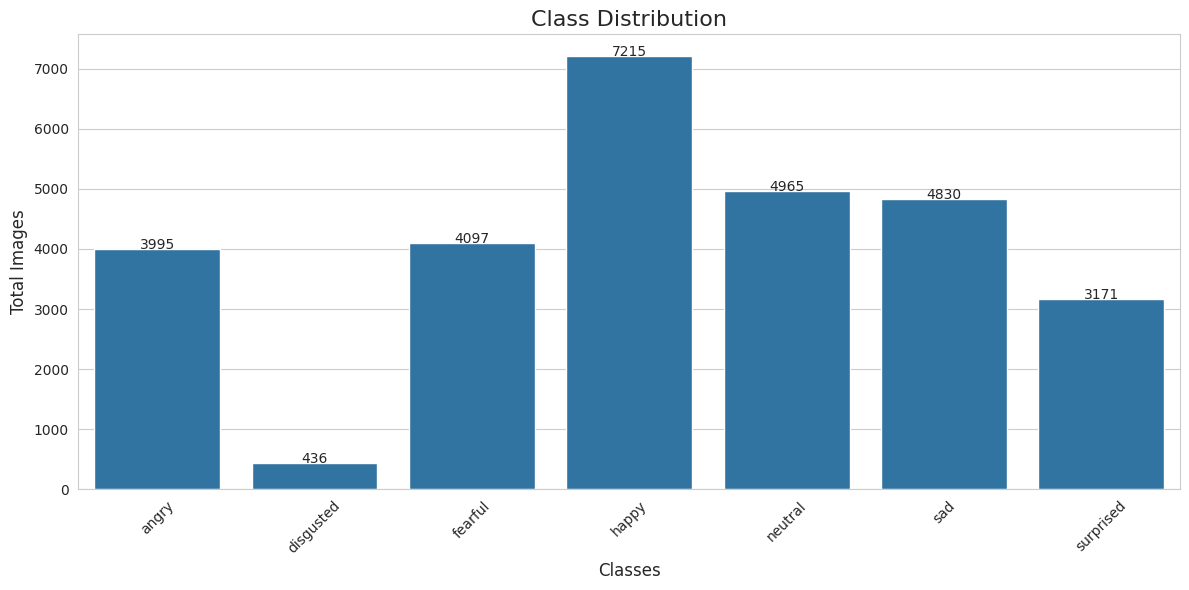

In [2]:
import glob

import matplotlib.pyplot as plt
import seaborn as sns


train_path = "/content/train"
test_path = "/content/test"
class_names = ["angry", "disgusted", "fearful", "happy", "neutral", "sad", "surprised"]
class_distribution = {}

# Put image paths to dictionary using class names as keys.
for class_name in class_names:
    class_distribution[class_name] = len(glob.glob(f"{train_path}/{class_name}/*"))

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()))

plt.title("Class Distribution", fontsize=16)
plt.xlabel("Classes", fontsize=12)
plt.ylabel("Total Images", fontsize=12)
plt.xticks(rotation=45)

# Add value labels of each bar.
for index, value in enumerate(class_distribution.values()):
    plt.text(index, value, str(value), ha="center", fontsize=10)

plt.tight_layout()
plt.show()

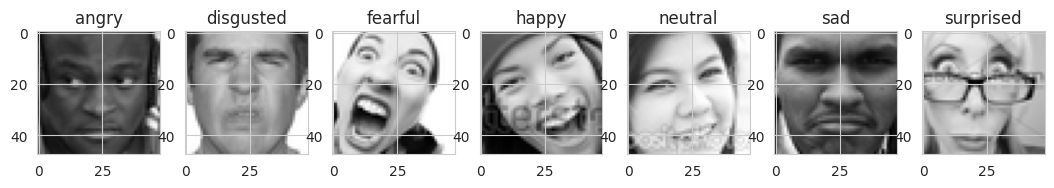

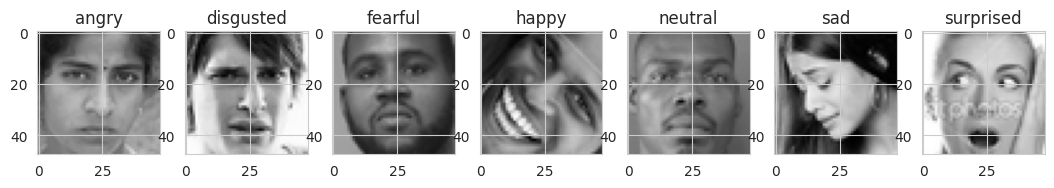

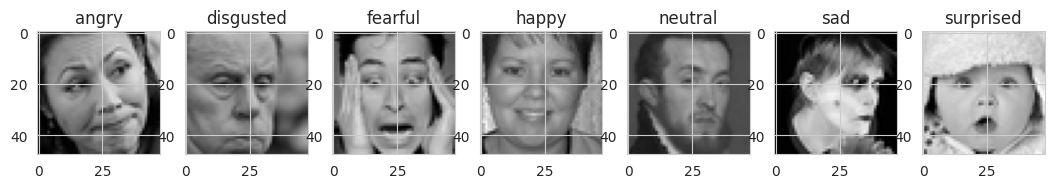

In [3]:
import cv2
import numpy as np


def plot_sample_images():
    fig, axis = plt.subplots(1, 7, figsize=[13, 15])

    for index, (class_name, count) in enumerate(class_distribution.items()):
        # Randomly choose images to plot.
        random_index = np.random.randint(0, count)
        img_read = cv2.imread(
            glob.glob(f"{train_path}/{class_name}/*")[random_index]
        )

        axis[index].imshow(img_read)
        axis[index].set_title(class_name)

# Plot several samples of each class.
for i in range(0, 3):
    plot_sample_images()

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Data generator for traning and validation.
train_data_generator = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 # 20% of images to be used for validation.
)

train_generator = train_data_generator.flow_from_directory(
    train_path,
    target_size=(64, 64),
    batch_size=16,
    class_mode="categorical",
    subset="training",
)

validation_generator = train_data_generator.flow_from_directory(
    train_path,
    target_size=(64, 64),
    batch_size=16,
    class_mode="categorical",
    subset="validation"
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [5]:
# Data generator for evaluation.
test_data_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_data_generator.flow_from_directory(
    test_path,
    target_size=(64, 64),
    batch_size=16,
    class_mode="categorical",
    shuffle = False  # Keep this False for confusion matrix.
)

Found 7178 images belonging to 7 classes.


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Class weights: {0: 1.0266404434114071, 1: 9.401555464592715, 2: 1.0009587727708533, 3: 0.5684585684585685, 4: 0.826068191627104, 5: 0.8491570541259982, 6: 1.2933160650937552}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 2, 2, 64)            │         294,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 2, 2, 64)            │             256 │
│ (BatchNormalization)                 │                             │              

 Total params: 21,410,247 (81.67 MB)

 Trainable params: 13,774,087 (52.54 MB)

 Non-trainable params: 7,636,160 (29.13 MB)

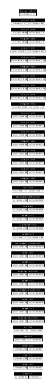

In [6]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.utils.class_weight import compute_class_weight

def calculate_class_weights(train_generator):
    class_counts = train_generator.classes
    unique_classes = np.unique(class_counts)

    class_weights = compute_class_weight(
        class_weight='balanced',
        classes=unique_classes,
        y=class_counts
    )

    class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}
    return class_weight_dict

def create_pretrained_model(input_shape):
    # Load VGG16
    base_model = VGG16(weights='imagenet',
                       include_top=False,
                       input_shape=input_shape)

    # Unfreeze beberapa layer terakhir untuk fine-tuning
    for layer in base_model.layers[:-4]:
        layer.trainable = False
    for layer in base_model.layers[-4:]:
        layer.trainable = True

    return base_model

base_model = create_pretrained_model((64, 64, 3))

def create_model(input_shape=(64, 64, 3)):
    # Base model
    base_model = create_pretrained_model(input_shape)

    # Custom layers dengan arsitektur yang dioptimalkan
    x = base_model.output

    # Additional convolutional blocks untuk feature extraction
    # First Convolutional Block
    x = Conv2D(64, kernel_size=3, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)

    x = Conv2D(64, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Second Convolutional Block
    x = Conv2D(128, kernel_size=3, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)

    x = Conv2D(128, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), padding='same')(x)

    # Third Convolutional Block
    x = Conv2D(256, kernel_size=3, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)

    x = Conv2D(256, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), padding='same')(x)

    # Flatten and Fully Connected Layers
    x = Flatten()(x)
    x = Dense(4096, activation = 'relu', kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.5)(x)
    x = Dense(1024, activation = 'relu', kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.5)(x)

    # Output layer
    predictions = Dense(7, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# Calculate class weights
class_weights = calculate_class_weights(train_generator)
print("Class weights:", class_weights)

# Buat model
model = create_model()
model.summary()
# Gambar flowchart dari model
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

# Menampilkan flowchart dalam notebook
img = plt.imread('cnn_model.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [10]:
import tensorflow as tf
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

f1 = tf.keras.metrics.F1Score(average='macro', threshold=0.5)

model.compile(
    optimizer=SGD(learning_rate=0.001, momentum=0.9, weight_decay=1e-4),
    loss=categorical_crossentropy,
    metrics=["accuracy", "AUC", f1]
)

# Define callbacks.
early_stopping = EarlyStopping(monitor="val_loss", patience=25, restore_best_weights=True,verbose=1)
checkpoint = ModelCheckpoint("emotion_detection_model.keras", monitor="val_accuracy", save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, min_lr=1e-7, verbose=1)

# Train the model.
history = model.fit(
    train_generator,
    epochs=80,
    validation_data=validation_generator,
    callbacks=[early_stopping, checkpoint, reduce_lr],
    class_weight=class_weights
)

# Determine at which epoch early stopping occurred
stopped_epoch = len(history.history['accuracy'])
print(f"Training stopped at epoch: {stopped_epoch}")

Epoch 1/80


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1436/1436 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - AUC: 0.7182 - accuracy: 0.3341 - f1_score: 0.1121 - loss: 12.1888
Epoch 1: val_accuracy improved from -inf to 0.39261, saving model to emotion_detection_model.keras
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 54s 31ms/step - AUC: 0.7182 - accuracy: 0.3341 - f1_score: 0.1121 - loss: 12.1879 - val_AUC: 0.7767 - val_accuracy: 0.3926 - val_f1_score: 0.1904 - val_loss: 8.3462 - learning_rate: 0.0010
Epoch 2/80
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.7628 - accuracy: 0.3777 - f1_score: 0.1773 - loss: 7.5006
Epoch 2: val_accuracy improved from 0.39261 to 0.40272, saving model to emotion_detection_model.keras
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 67s 25ms/step - AUC: 0.7628 - accuracy: 0.3778 - f1_score: 0.1773 - loss: 7.5001 - val_AUC: 0.7946 - val_accuracy: 0.4027 - val_f1_score: 0.1889 - val_loss: 5.3522 - learning_rate: 0.0010
Epoch 3/80
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - AUC: 0.7867 - accuracy: 0.3995 - f1_score: 0.2051 - loss: 4.8302
Epoc

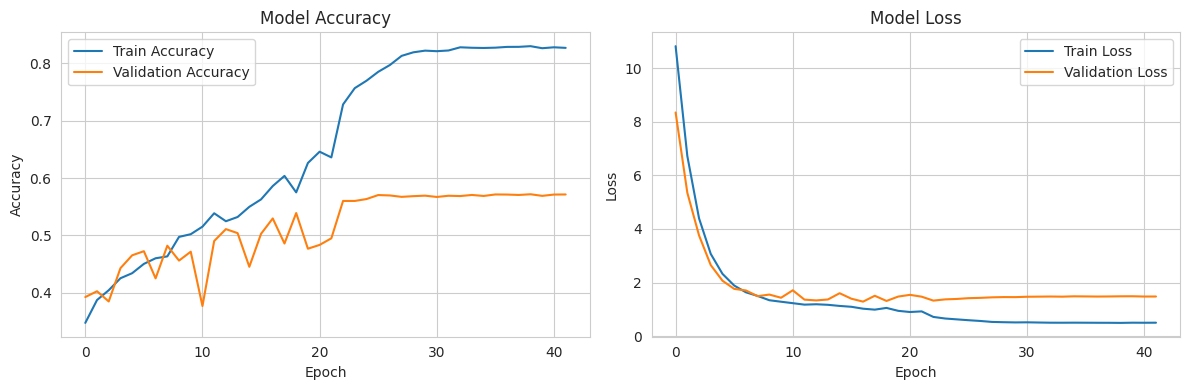

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

449/449 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step
Classification Report (Test Data):

              precision    recall  f1-score   support

       angry       0.43      0.32      0.37       958
    digusted       0.47      0.60      0.53       111
     fearful       0.38      0.28      0.32      1024
       happy       0.73      0.80      0.77      1774
     neutral       0.47      0.55      0.50      1233
         sad       0.40      0.38      0.39      1247
   surprised       0.63      0.75      0.69       831

    accuracy                           0.54      7178
   macro avg       0.50      0.53      0.51      7178
weighted avg       0.52      0.54      0.53      7178



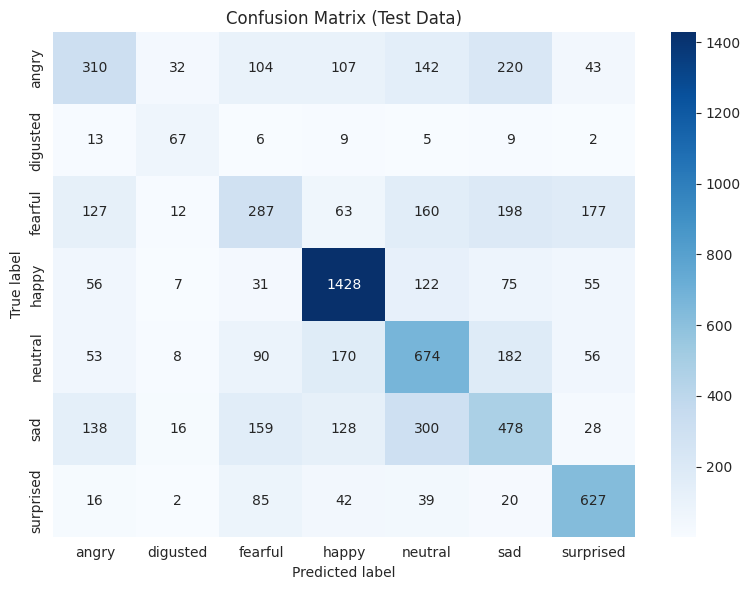

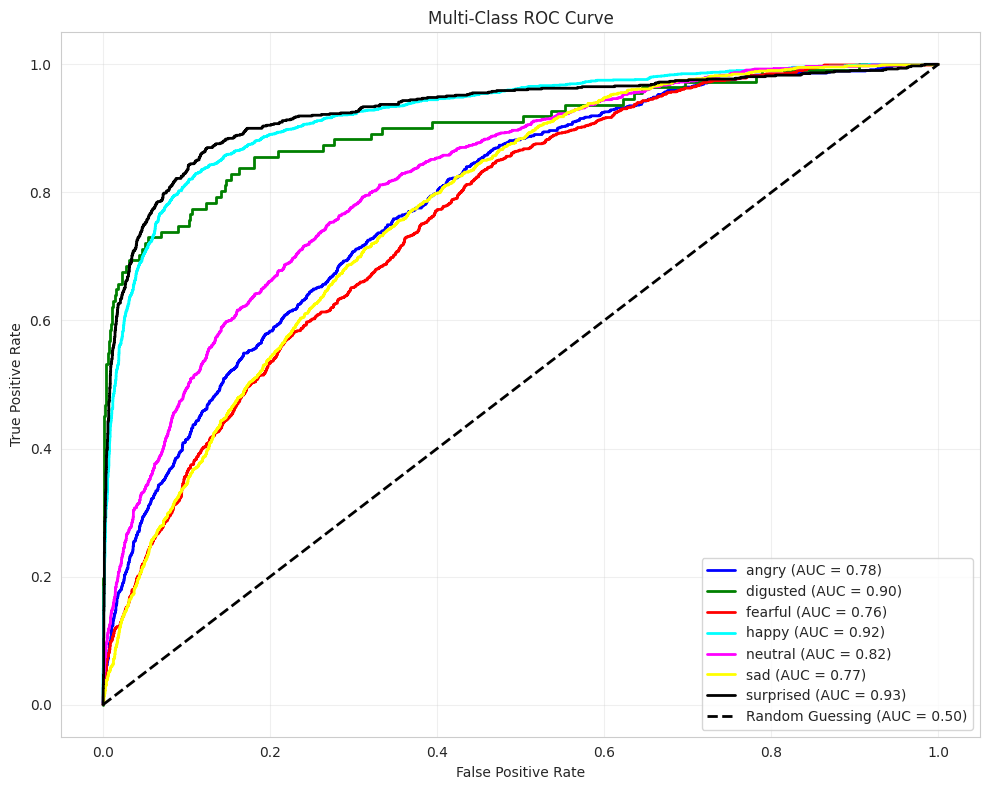

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Nama-nama kelas emosi
class_names = ["angry", "digusted", "fearful", "happy", "neutral", "sad", "surprised"]

# Peroleh true labels dari test generator
true_labels_test = test_generator.classes

# Reset test generator sebelum prediksi
test_generator.reset()

# Dapatkan prediksi model pada data test
predicted_test = model.predict(test_generator)
predicted_labels_test = np.argmax(predicted_test, axis=1)

# Hitung confusion matrix untuk data test
cm_test = confusion_matrix(true_labels_test, predicted_labels_test)

# Classification report untuk data test
report_test = classification_report(true_labels_test, predicted_labels_test, target_names=class_names)
print("Classification Report (Test Data):\n")
print(report_test)

# Plot confusion matrix untuk data test
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix (Test Data)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()

# ================================
# ROC Curve and AUC Calculation
# ================================

# Binarisasi true labels (one-hot encoding)
true_labels_bin = label_binarize(true_labels_test, classes=list(range(len(class_names))))

# Inisialisasi plot ROC Curve
plt.figure(figsize=(10, 8))

# Warna untuk setiap kelas
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']

# Plot ROC Curve untuk setiap kelas
for i, color in enumerate(colors):
    # Hitung FPR, TPR, dan threshold
    fpr, tpr, _ = roc_curve(true_labels_bin[:, i], predicted_test[:, i])
    # Hitung AUC
    roc_auc = auc(fpr, tpr)
    # Plot ROC Curve
    plt.plot(fpr, tpr, color=color, lw=2, label=f"{class_names[i]} (AUC = {roc_auc:.2f})")

# Tambahkan diagonal sebagai acuan
plt.plot([0, 1], [0, 1], 'k--', lw=2, label="Random Guessing (AUC = 0.50)")

# Format plot
plt.title("Multi-Class ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()